In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
stores=pd.read_csv("stores.csv")
oil=pd.read_csv("oil.csv")
holiday=pd.read_csv("holidays_events.csv")
transactions=pd.read_csv("transactions.csv")
sample_submission=pd.read_csv("sample_submission.csv")

In [4]:
train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [6]:
stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [7]:
test

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [8]:
oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [9]:
holiday

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [10]:
transactions=transactions.sort_values(["store_nbr","date"])
transactions

,date,store_nbr,transactions
1,2013-01-02,1,2111
47,2013-01-03,1,1833
93,2013-01-04,1,1863
139,2013-01-05,1,1509
185,2013-01-06,1,520
...,...,...,...
83271,2017-08-11,54,768
83325,2017-08-12,54,903
83379,2017-08-13,54,1054
83433,2017-08-14,54,818


In [11]:
train["date"]=pd.to_datetime(train.date)
test["date"]=pd.to_datetime(test.date)
transactions["date"]=pd.to_datetime(transactions.date)
holiday["date"]=pd.to_datetime(holiday.date)
oil["date"]=pd.to_datetime(oil.date)

In [12]:
train['onpromotion']=train['onpromotion'].astype("float16")
test['onpromotion']=test['onpromotion'].astype("float16")
train['sales']=train['sales'].astype("float32")
stores['cluster']=stores['cluster'].astype("int8")

In [13]:
def merge_with_lag(df, oil, holiday):
    df=df.merge(oil.assign(date=oil['date']+pd.DateOffset(days=7)), on='date', how='left', suffixes=('', '_lag_7'))
    df=df.merge(holiday, on='date', how='left')
    return df
train=merge_with_lag(train,oil,holiday)
train

c:\Users\gregl\Desktop\ML_Projects\Store Sales Forecasting\.venv\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.000000,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.000000,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.000000,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.000000,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.000000,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.132996,0.0,49.07,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.552994,1.0,49.07,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054345,3000885,2017-08-15,9,PRODUCE,2419.729004,148.0,49.07,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000000,8.0,49.07,Holiday,Local,Riobamba,Fundacion de Riobamba,False


In [14]:
test=merge_with_lag(test,oil,holiday)

In [15]:
train=train.merge(stores, on='store_nbr', how='left')
train=train.merge(transactions, on=['date', 'store_nbr'], how='left')
train=train.rename(columns={"type_x": "holiday_type", "type_y": "store_type"})

In [16]:
train

c:\Users\gregl\Desktop\ML_Projects\Store Sales Forecasting\.venv\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,holiday_type,locale,locale_name,description,transferred,city,state,store_type,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.000000,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.000000,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.000000,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.000000,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.000000,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.132996,0.0,49.07,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,2155.0
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.552994,1.0,49.07,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,2155.0
3054345,3000885,2017-08-15,9,PRODUCE,2419.729004,148.0,49.07,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,2155.0
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000000,8.0,49.07,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,2155.0


In [17]:
def temporal_features(df):
    df['year']=df['date'].dt.year
    df['month']=df['date'].dt.month
    df['week']=df['date'].dt.isocalendar().week
    df['quarter']=df['date'].dt.quarter
    df['day_of_week']=df['date'].dt.day_name()
    df['day_of_month']=df['date'].dt.day
    df['day_of_year']=df['date'].dt.dayofyear
    df['is_weekend']=(df['day_of_week'].isin(['Saturday', 'Sunday'])).astype(int)
    df['is_month_start']=df['date'].dt.is_month_start.astype(int)
    df['is_month_end']=df['date'].dt.is_month_end.astype(int)
    df['dayofweek']=df['date'].dt.dayofweek
    #Cyclical encoding for the wraparounds
    df['day_sin']=np.sin(2 * np.pi * df['day_of_year']/365)
    df['day_cos']=np.cos(2 * np.pi * df['day_of_year']/365)
    df['month_sin']=np.sin(2 * np.pi * df['month']/12)
    df['month_cos']=np.cos(2 * np.pi * df['month']/12)
    return df

In [19]:
train=temporal_features(train)
test=temporal_features(test)

In [20]:
train

c:\Users\gregl\Desktop\ML_Projects\Store Sales Forecasting\.venv\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
c:\Users\gregl\Desktop\ML_Projects\Store Sales Forecasting\.venv\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,holiday_type,locale,locale_name,...,day_of_month,day_of_year,is_weekend,is_month_start,is_month_end,dayofweek,day_sin,day_cos,month_sin,month_cos
0,0,2013-01-01,1,AUTOMOTIVE,0.000000,0.0,NaN,Holiday,National,Ecuador,...,1,1,0,1,0,1,0.017213,0.999852,0.500000,0.866025
1,1,2013-01-01,1,BABY CARE,0.000000,0.0,NaN,Holiday,National,Ecuador,...,1,1,0,1,0,1,0.017213,0.999852,0.500000,0.866025
2,2,2013-01-01,1,BEAUTY,0.000000,0.0,NaN,Holiday,National,Ecuador,...,1,1,0,1,0,1,0.017213,0.999852,0.500000,0.866025
3,3,2013-01-01,1,BEVERAGES,0.000000,0.0,NaN,Holiday,National,Ecuador,...,1,1,0,1,0,1,0.017213,0.999852,0.500000,0.866025
4,4,2013-01-01,1,BOOKS,0.000000,0.0,NaN,Holiday,National,Ecuador,...,1,1,0,1,0,1,0.017213,0.999852,0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.132996,0.0,49.07,Holiday,Local,Riobamba,...,15,227,0,0,0,1,-0.693281,-0.720667,-0.866025,-0.500000
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.552994,1.0,49.07,Holiday,Local,Riobamba,...,15,227,0,0,0,1,-0.693281,-0.720667,-0.866025,-0.500000
3054345,3000885,2017-08-15,9,PRODUCE,2419.729004,148.0,49.07,Holiday,Local,Riobamba,...,15,227,0,0,0,1,-0.693281,-0.720667,-0.866025,-0.500000
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000000,8.0,49.07,Holiday,Local,Riobamba,...,15,227,0,0,0,1,-0.693281,-0.720667,-0.866025,-0.500000


In [21]:
train.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'dcoilwtico', 'holiday_type', 'locale', 'locale_name', 'description',
       'transferred', 'city', 'state', 'store_type', 'cluster', 'transactions',
       'year', 'month', 'week', 'quarter', 'day_of_week', 'day_of_month',
       'day_of_year', 'is_weekend', 'is_month_start', 'is_month_end',
       'dayofweek', 'day_sin', 'day_cos', 'month_sin', 'month_cos'],
      dtype='object')

In [22]:
cat_columns=["family","holiday_type","locale","locale_name","description","transferred","city","state","store_type","day_of_week"]
for i in range(len(cat_columns)):
    print(cat_columns[i], train[cat_columns[i]].nunique())

family 33
holiday_type 6
locale 3
locale_name 24
description 101
transferred 2
city 22
state 16
store_type 5
day_of_week 7


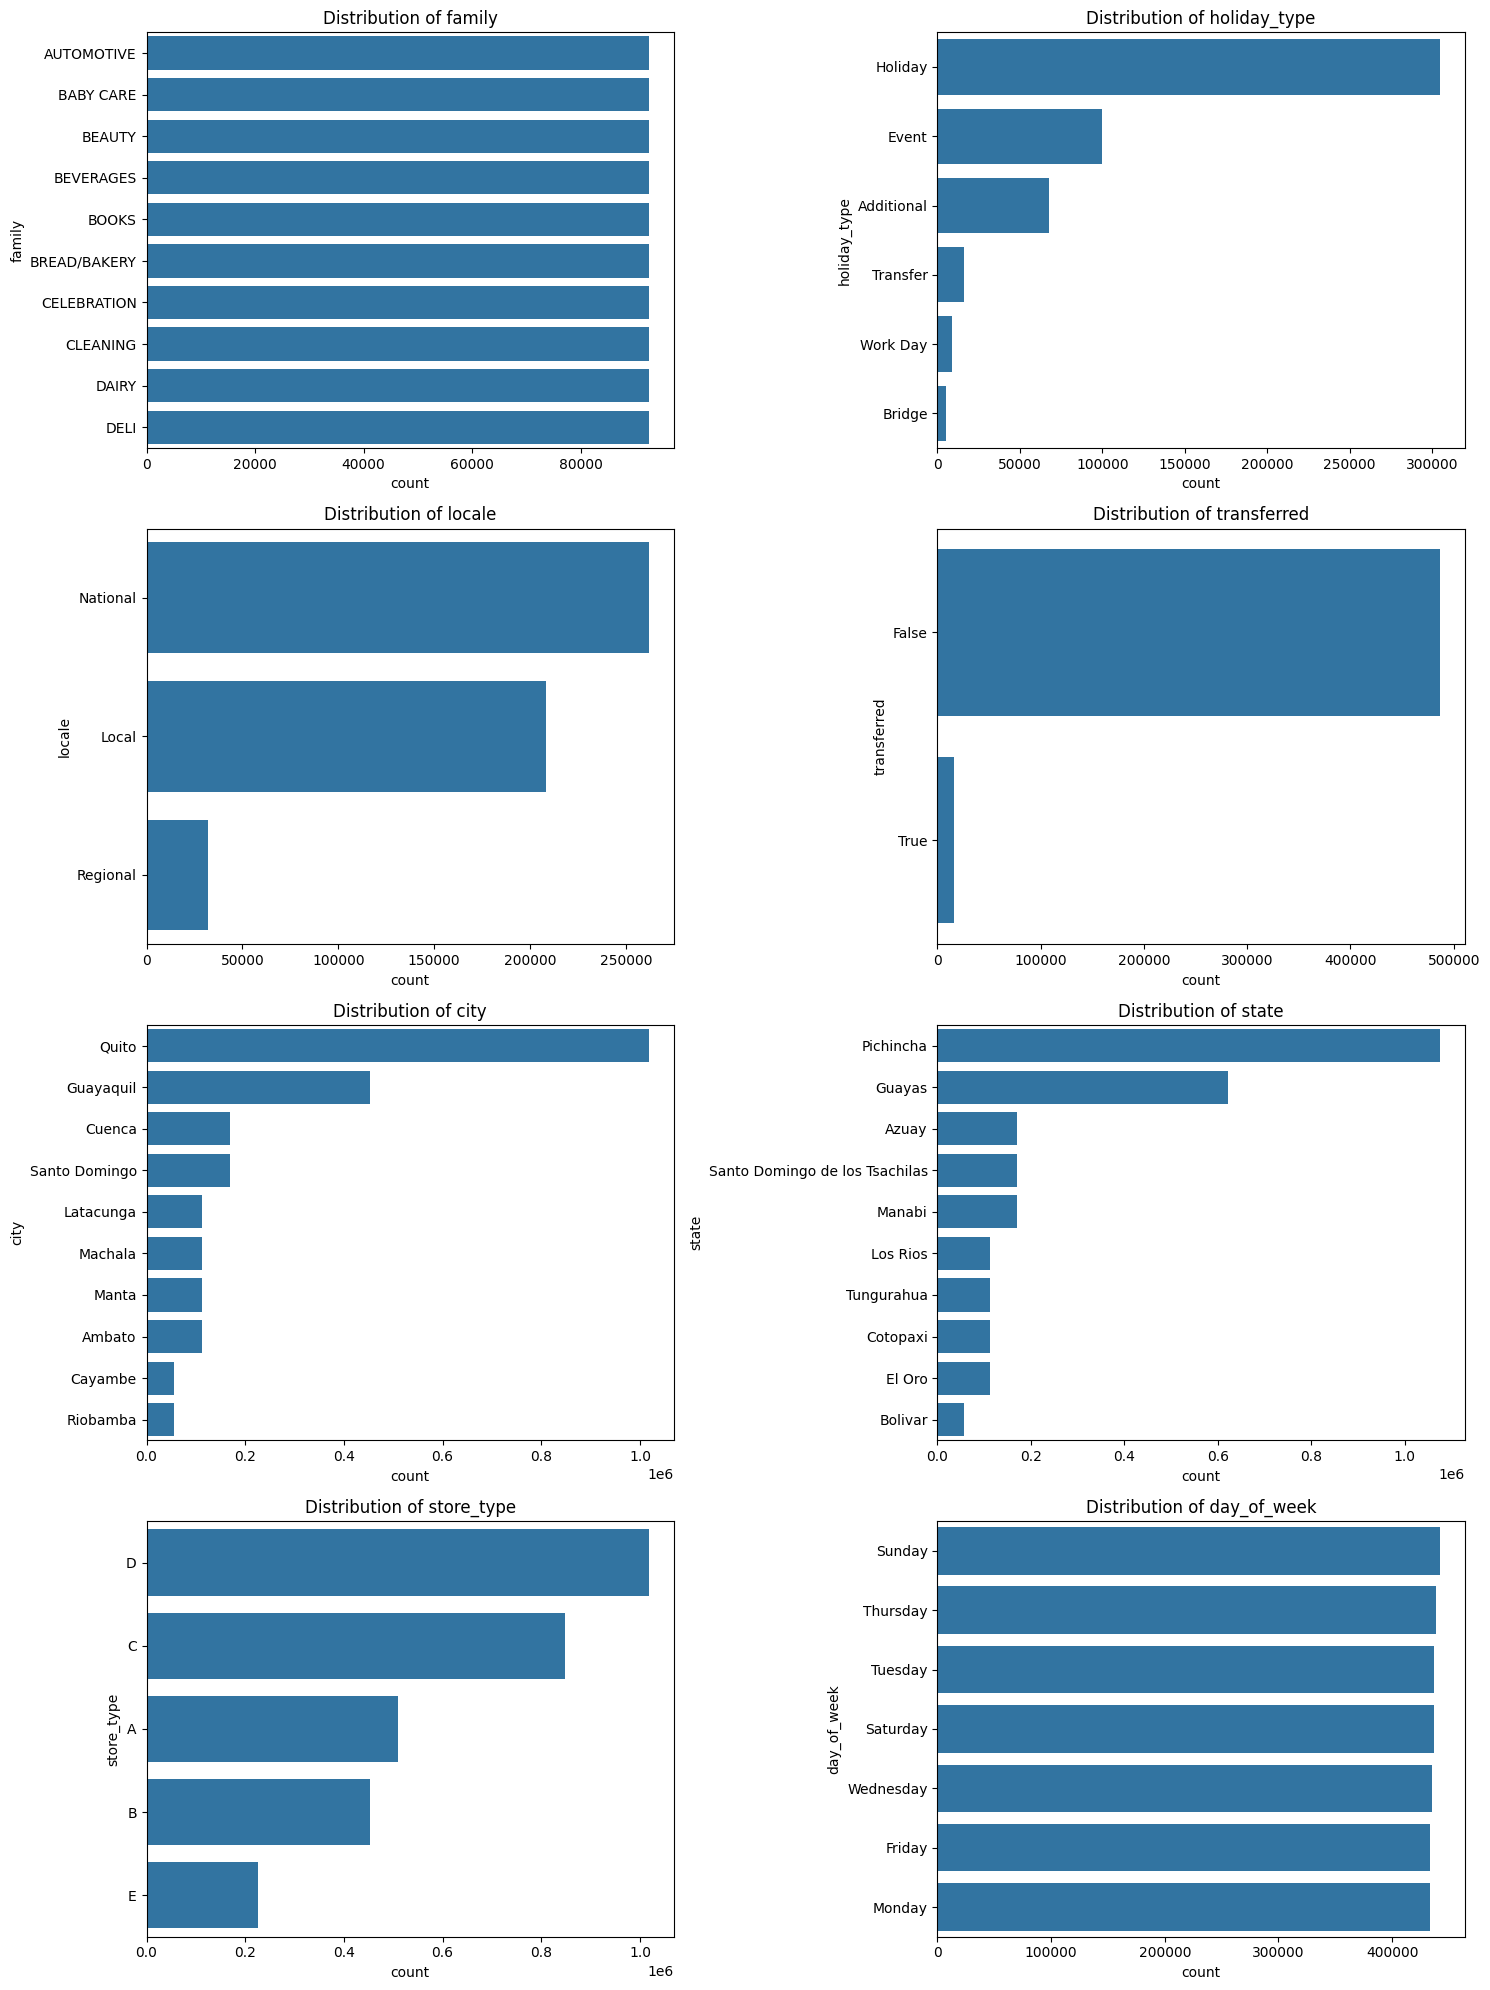

In [23]:
drop_cols=["locale_name","description"]
cat_vars = train.select_dtypes(include='object').columns.drop(drop_cols, errors='ignore')
#Plotting categorical variables for some visualisation
plt.figure(figsize=(15,20))
for i, col in enumerate(cat_vars,1):
    plt.subplot(4,2,i)
    sns.countplot(data=train,y=col,order=train[col].value_counts().index[:10]) #Top 10 categories
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

In [24]:
train.onpromotion=train.onpromotion.astype("float32")

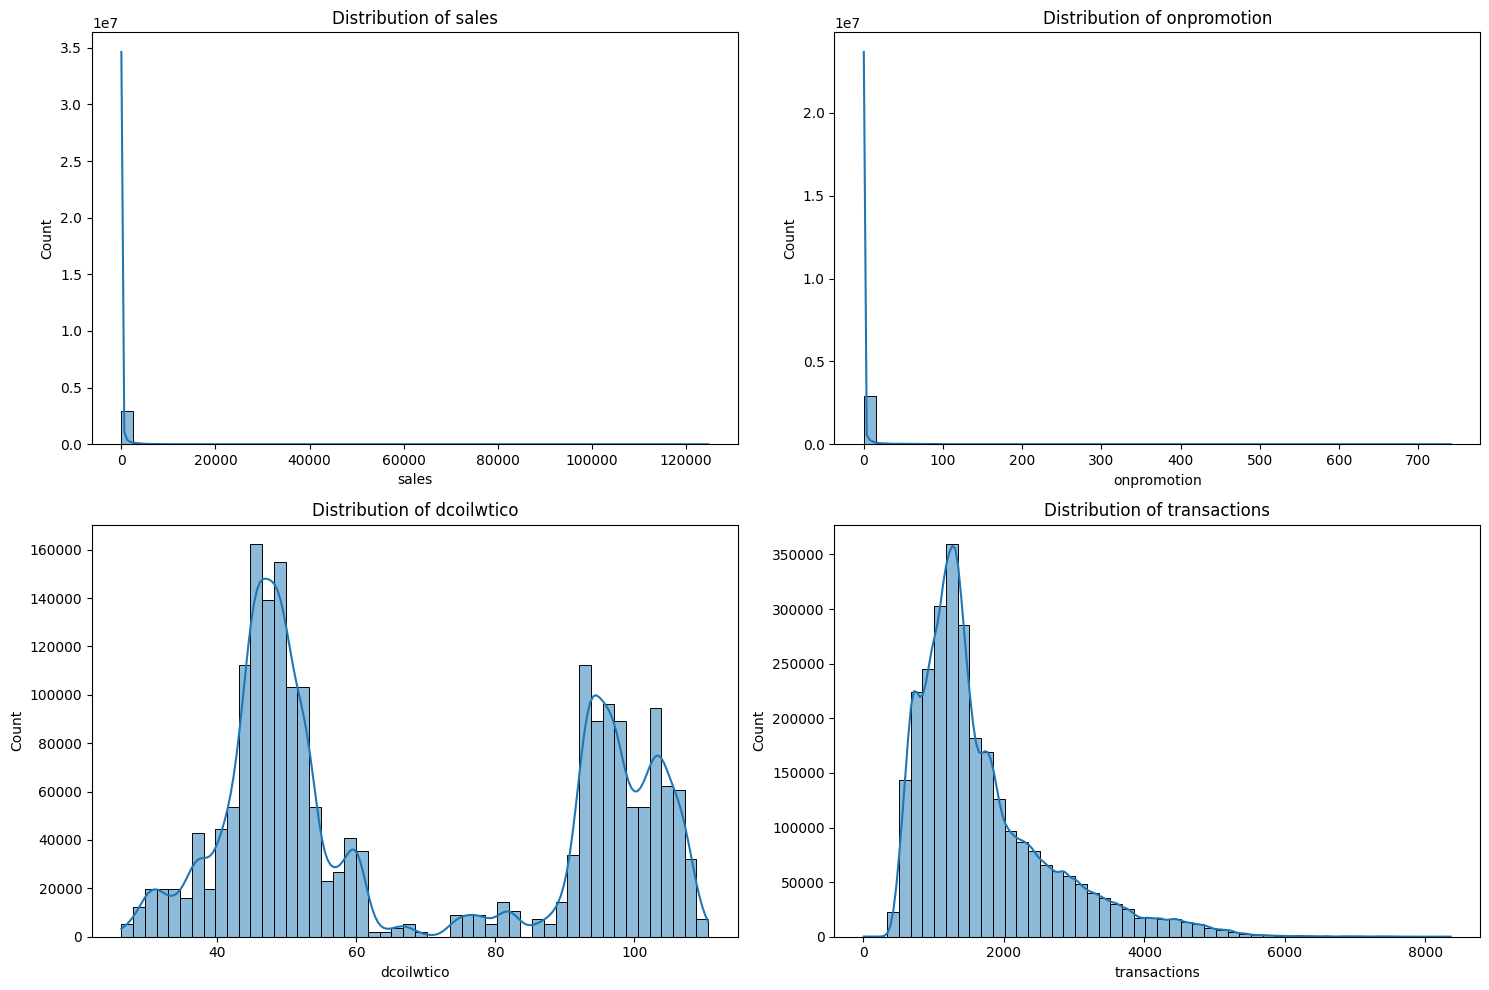

In [25]:
num_vars=['sales', 'onpromotion', 'dcoilwtico', 'transactions']
plt.figure(figsize=(15,10))
for i, col in enumerate(num_vars,1):
    plt.subplot(2,2,i)    
    # We drop the NaN values for visualisation purposes
    plot_data = train[col].dropna()
    sns.histplot(data=plot_data, kde=True, bins=50)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [26]:
print(train[num_vars].describe())

              sales   onpromotion    dcoilwtico  transactions
count  3.054348e+06  3.054348e+06  2.090286e+06  2.805231e+06
mean   3.590209e+02  2.617480e+00  6.807354e+01  1.697071e+03
std    1.107286e+03  1.225494e+01  2.569465e+01  9.668317e+02
min    0.000000e+00  0.000000e+00  2.619000e+01  5.000000e+00
25%    0.000000e+00  0.000000e+00  4.638000e+01  1.046000e+03
50%    1.100000e+01  0.000000e+00  5.346000e+01  1.395000e+03
75%    1.960110e+02  0.000000e+00  9.582000e+01  2.081000e+03
max    1.247170e+05  7.410000e+02  1.106200e+02  8.359000e+03


In [27]:
#Extraction
train['day']=train['date'].dt.day
train['day_name']=train['date'].dt.day_name()

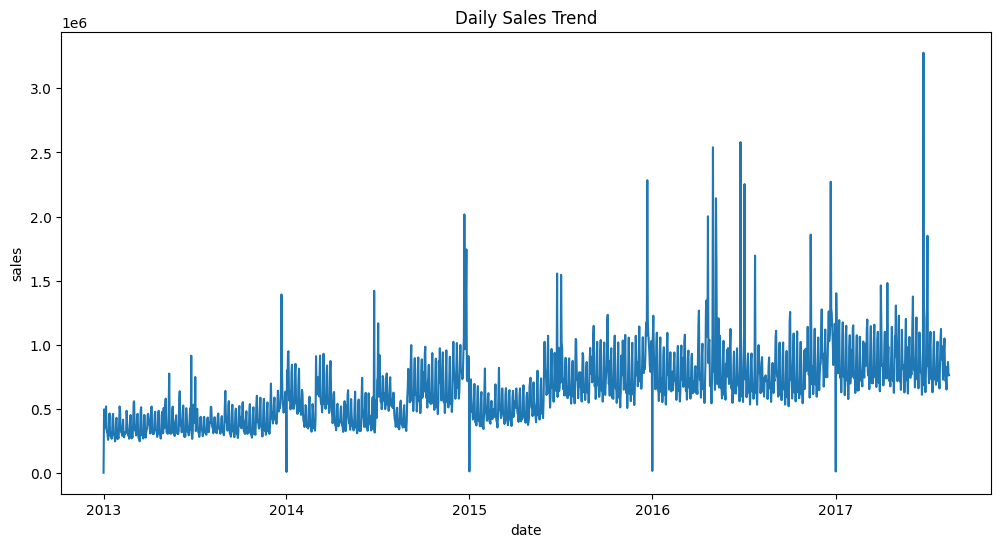

In [28]:
# Plot sales over time
plt.figure(figsize=(12,6))
sns.lineplot(data=train.groupby('date')['sales'].sum().reset_index(), x='date', y='sales')
plt.title('Daily Sales Trend')
plt.show()

In [29]:
train[["store_type","sales"]].groupby(["store_type"]).mean().sort_values(by="sales",ascending=False)

,sales
store_type,
A,708.378174
D,352.084503
B,328.275238
E,270.285492
C,197.790649


In [30]:
train[["family","sales"]].groupby(["family"]).mean().sort_values(by="sales",ascending=False)

,sales
family,
GROCERY I,3790.432861
BEVERAGES,2394.912598
PRODUCE,1355.373657
CLEANING,1074.171509
DAIRY,711.175964
BREAD/BAKERY,464.150604
POULTRY,351.078796
MEATS,341.965912
PERSONAL CARE,271.192383


In [31]:
train[["holiday_type","sales"]].groupby(["holiday_type"]).mean().sort_values(by="sales",ascending=False)

,sales
holiday_type,
Additional,487.628906
Transfer,467.753113
Bridge,446.750854
Event,425.660065
Work Day,372.157532
Holiday,358.433807


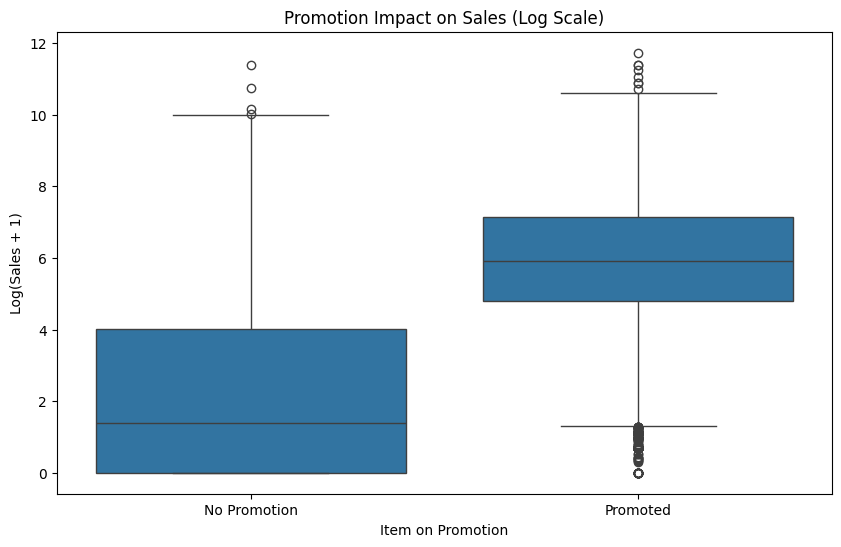

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(x=train["onpromotion"] > 0, 
            y=np.log1p(train["sales"])) # We use log transform for better visibility
plt.title("Promotion Impact on Sales (Log Scale)")
plt.xlabel("Item on Promotion")
plt.ylabel("Log(Sales + 1)")
plt.xticks([0,1], ["No Promotion","Promoted"])
plt.show()

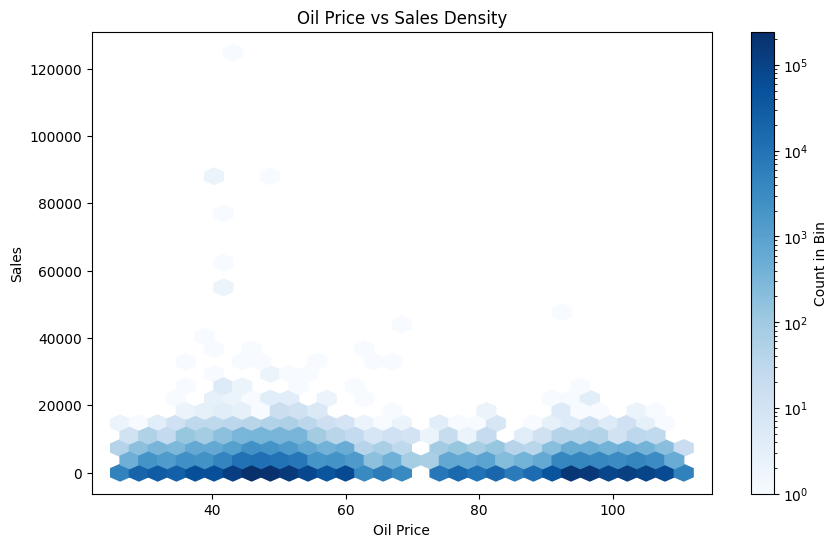

In [33]:
plt.figure(figsize=(10,6))
plt.hexbin(x=train["dcoilwtico"],y=train["sales"],gridsize=30, cmap="Blues", bins='log')
plt.colorbar(label="Count in Bin")
plt.title("Oil Price vs Sales Density")
plt.xlabel("Oil Price")
plt.ylabel("Sales")
plt.show()

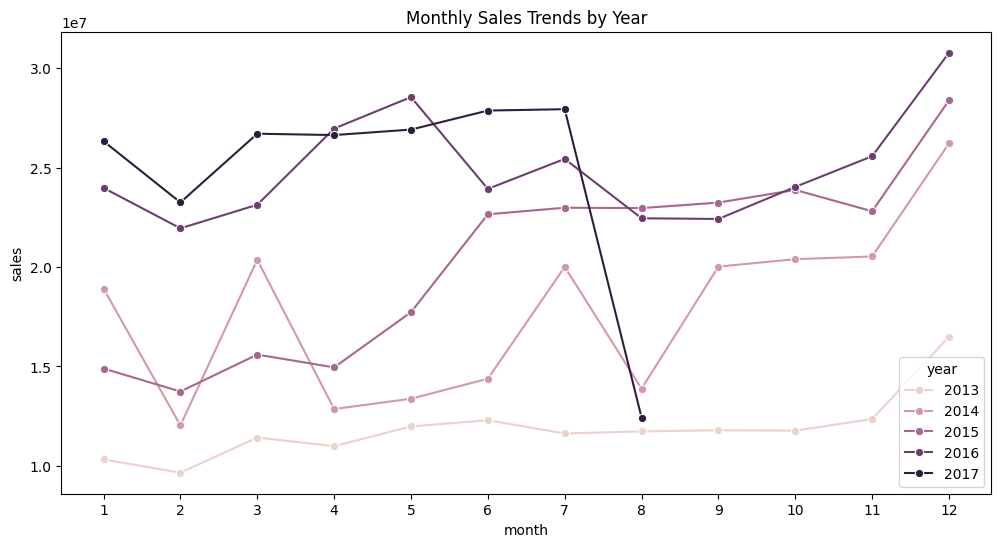

In [34]:
monthly_sales=train.groupby(["year","month"])["sales"].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x="month",y="sales", hue="year",data=monthly_sales, marker="o")
plt.title("Monthly Sales Trends by Year")
plt.xticks(range(1,13))
plt.show()

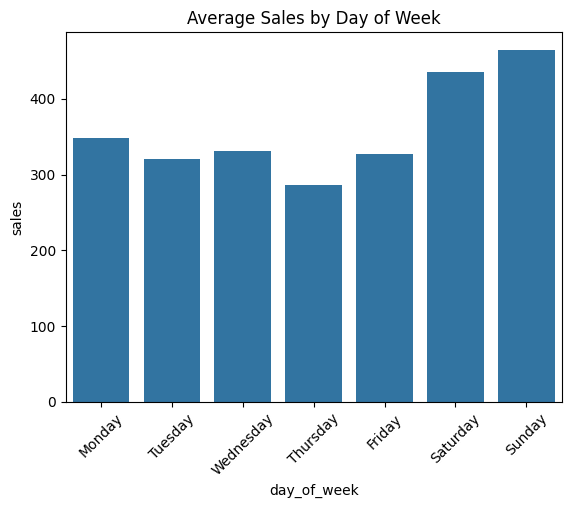

In [35]:
dow_sales=train.groupby("day_of_week")["sales"].mean().reset_index()
order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.barplot(x="day_of_week",y="sales", data=dow_sales,order=order)
plt.title("Average Sales by Day of Week")
plt.xticks(rotation=45)
plt.show()

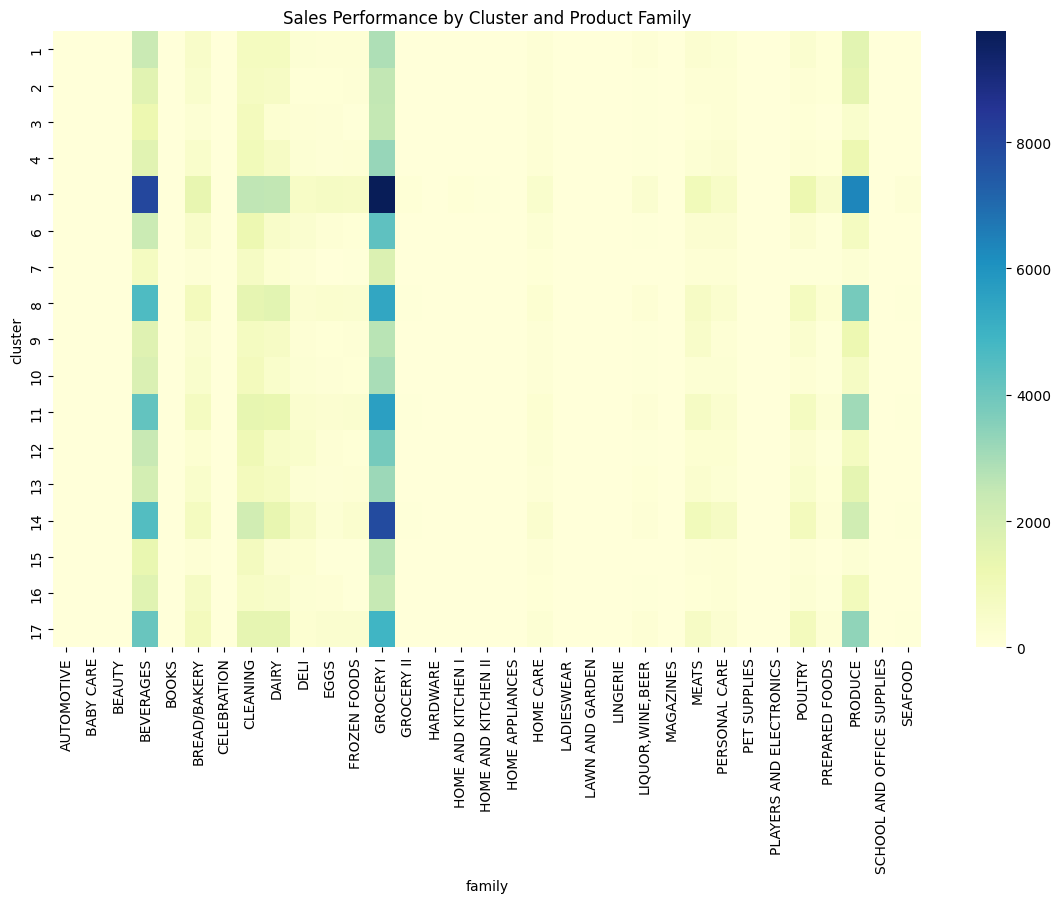

In [36]:
cluster_performance=train.groupby(["cluster", "family"])["sales"].mean().unstack()
plt.figure(figsize=(14,8))
sns.heatmap(cluster_performance, cmap="YlGnBu")
plt.title("Sales Performance by Cluster and Product Family")
plt.show()

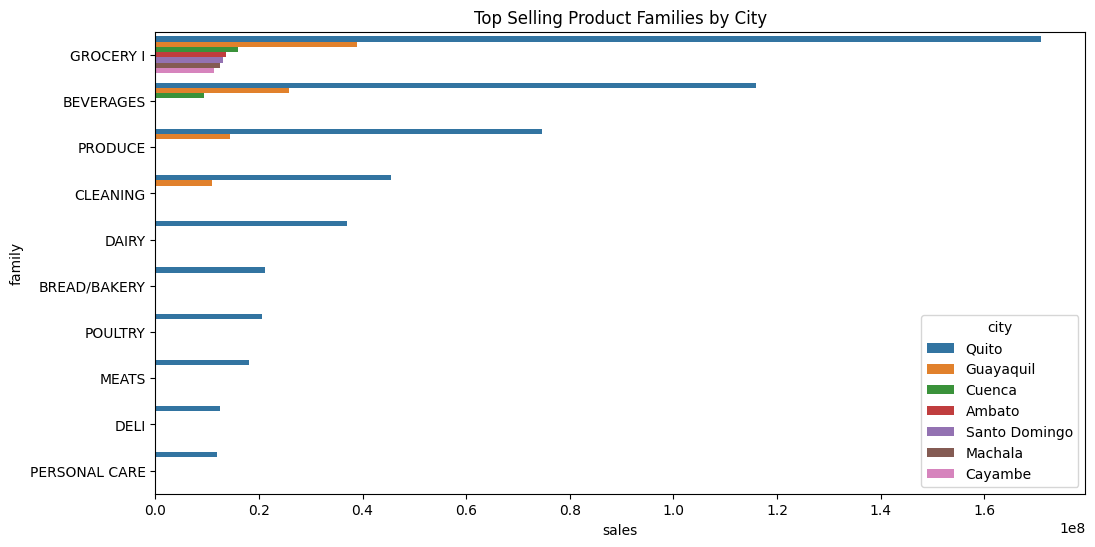

In [37]:
city_sales = train.groupby(["city", "family"])["sales"].sum().nlargest(20).reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x="sales", y="family", hue="city", data=city_sales)
plt.title("Top Selling Product Families by City")
plt.show()

In [38]:
# Missing values
missing=train.isnull().sum().sort_values(ascending=False)
missing_pct=(train.isnull().mean()*100).sort_values(ascending=False)
pd.concat([missing, missing_pct], axis=1, keys=["Total","Percentage"])

,Total,Percentage
locale_name,2551824,83.547258
locale,2551824,83.547258
transferred,2551824,83.547258
description,2551824,83.547258
holiday_type,2551824,83.547258
dcoilwtico,964062,31.563594
transactions,249117,8.156143
id,0,0.000000
date,0,0.000000
onpromotion,0,0.000000


In [39]:
primary_holidays=holiday[holiday["transferred"] == False]
train=train.merge(primary_holidays,on="date",how="left")
test=test.merge(primary_holidays,on="date",how="left")

In [40]:
def business_aware_outliers(df, columns):
    outliers=pd.Series(False, index=df.index)    
    # Column-specific rules
    for col in columns:
        if col=="onpromotion":
            # Rule 1: Onpromotion (0-100 normal range)
            outliers|=df[col].gt(100)
        elif col=="transactions":
            # Rule 2: Store-specific transaction limits (3*sigma)
            transaction_limits=df.groupby("store_nbr")[col].agg(["mean","std"])
            for store in transaction_limits.index:
                store_mask=(df["store_nbr"]==store)
                upper_limit=transaction_limits.loc[store,"mean"]+3*transaction_limits.loc[store,"std"]
                outliers|=store_mask&df[col].gt(upper_limit)                
        elif col=="dcoilwtico":
            # Rule 3: Oil price volatility (30-day rolling 3*sigma)
            oil_rolling=df[col].rolling(30).agg(["mean","std"])
            upper_oil=oil_rolling["mean"]+3*oil_rolling["std"]
            outliers|=df[col].gt(upper_oil.fillna(upper_oil.mean()))    
    return outliers[outliers].index

In [41]:
# Usage
outlier_cols=["onpromotion", "dcoilwtico","transactions"]
outliers=business_aware_outliers(train, outlier_cols)
print(f"Business-validated outliers detected:{len(outliers)}({len(outliers)/len(train):.2%})")

Business-validated outliers detected:52974(1.66%)


In [42]:
def plot_outliers_optimized(df, sample_size=50000):
    # Make sure the DataFrame has the outlier_flag column
    if "outlier_flag" not in df.columns:
        # Get the outlier indices from the business_aware_outliers function
        outlier_cols=["onpromotion", "dcoilwtico","transactions"]
        outlier_indices=business_aware_outliers(df, outlier_cols)        
        # Create the outlier_flag column
        df=df.copy() # Create a copy to avoid modifying the original
        df["outlier_flag"]=False
        df.loc[outlier_indices,"outlier_flag"]=True    
    # 1. Smart Sampling - Stratified to preserve outlier ratio
    outlier_ratio=df["outlier_flag"].mean()
    sample_outliers=min(int(sample_size*outlier_ratio), 
                      df["outlier_flag"].sum())
    sample_normal=sample_size-sample_outliers    
    outlier_sample=df[df["outlier_flag"]].sample(sample_outliers, random_state=42)
    normal_sample=df[~df["outlier_flag"]].sample(sample_normal, random_state=42)
    plot_sample=pd.concat([outlier_sample, normal_sample])    
    # 2. Enhanced Visualization
    plt.figure(figsize=(16,8))    
    # Panel 1: Temporal View
    ax1=plt.subplot(2,2,(1, 2))
    sns.scatterplot(data=plot_sample, x="date", y="transactions", hue="outlier_flag", palette={True:"red", False:"blue"},alpha=0.6, s=15, edgecolor=None)
    plt.title(f"Transaction Outliers Over Time\n(Sample: {sample_size:,} points)",pad=15)
    plt.grid(True,alpha=0.3)    
    # Panel 2: Distribution Comparison
    plt.subplot(2,2,3)
    sns.boxplot(x="outlier_flag",y="transactions",data=plot_sample, showfliers=False)
    plt.yscale("log")
    plt.title("Log-Scale Distribution Comparison")
    plt.xlabel("Outlier Status")    
    # Panel 3: Store-wise Outlier Count
    plt.subplot(2, 2, 4)
    store_outliers = df[df["outlier_flag"]].groupby("store_nbr").size()
    store_outliers.nlargest(10).plot(kind="bar", color="coral")
    plt.title("Top 10 Stores by Outlier Count")
    plt.ylabel("Outlier Count")
    plt.xticks(rotation=45)    
    plt.tight_layout()
    plt.show()

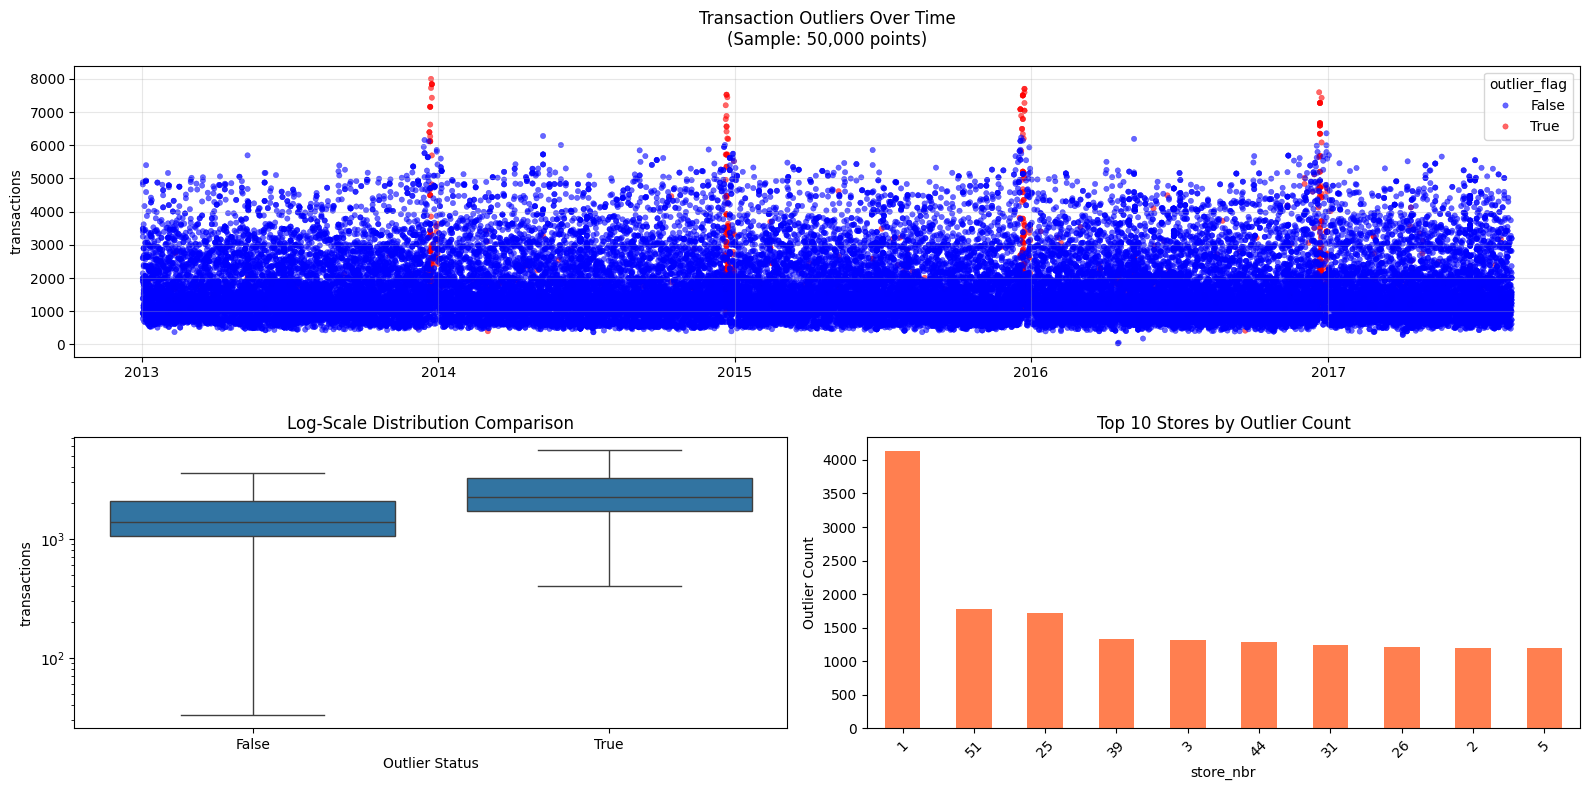

In [43]:
plot_outliers_optimized(train)

In [44]:
train=temporal_features(train)
# Monthly moving average
train["rolling_mean_30"]=train.groupby(["store_nbr","family"])["sales"].transform(lambda x:x.rolling(30, min_periods=1).mean())
# Seasonality
train["is_holiday"]=train["holiday_type"].notnull().astype(int)

In [45]:
train=train.sort_values(["store_nbr","family","date"])
for lag in [1,2,3,7,14,28]:
    train[f'sales_lag_{lag}']=train.groupby(["store_nbr", "family"])["sales"].shift(lag)

In [46]:
train["is_holiday"]=(~train["holiday_type"].isna()).astype(int)
train["holiday_type"]=train["holiday_type"].fillna("None")

In [47]:
oil=oil.set_index("date")["dcoilwtico"].interpolate(method="time").reset_index()
train["oil_rolling_mean7"]=train.groupby("year")["dcoilwtico"].transform(lambda x:x.rolling(7,1).mean())
train["oil_rolling_std7"]=train.groupby("year")["dcoilwtico"].transform(lambda x: x.rolling(7,1).std())
train["oil_pct_change"]=train.groupby("year")["dcoilwtico"].pct_change()

C:\Users\gregl\AppData\Local\Temp\ipykernel_8228\2180938496.py:4: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  train["oil_pct_change"]=train.groupby("year")["dcoilwtico"].pct_change()


In [48]:
store_family_stats=train.groupby(["store_nbr","family"]).agg({"sales":["mean","median","std"]}).reset_index()
store_family_stats.columns=["store_nbr","family","store_family_mean","store_family_median","store_family_std"]
train=train.merge(store_family_stats, on=["store_nbr","family"], how="left")
test=test.merge(store_family_stats, on=["store_nbr","family"], how="left")

In [49]:
train["promotion_intensity"]=train["onpromotion"]/(train.groupby(["date","family"])["onpromotion"].transform("sum")+1e-6)
train["days_since_last_promotion"]=train.groupby(["store_nbr","family"])["onpromotion"].transform(lambda x:(x==0).cumsum())
test["promotion_intensity"]=test['onpromotion']/(test.groupby(["date","family"])["onpromotion"].transform("sum")+1e-6)
test["days_since_last_promotion"]=test.groupby(["store_nbr","family"])["onpromotion"].transform(lambda x:(x==0).cumsum())

In [50]:
# Fill missing transactions with store's average
store_trans_avg=train.groupby("store_nbr")["transactions"].mean().reset_index()
store_trans_avg.columns=["store_nbr","store_mean_transactions"]
train=train.merge(store_trans_avg, on="store_nbr", how="left")
train["transactions"]=train["transactions"].fillna(train["store_mean_transactions"])
# Create sales per transaction feature
train["sales_per_transaction"]=train["sales"]/train["transactions"]

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [53]:
def rmsle(y_true,y_pred):
    y_true=np.maximum(y_true,0)
    y_pred=np.maximum(y_pred,0)
    return np.sqrt(mean_squared_log_error(y_true,y_pred))

In [54]:
features = ["store_nbr","family","onpromotion","dcoilwtico","transactions","year","month","week","quarter","day_of_week","day_of_month","day_of_year", "is_weekend", "is_month_start", "is_month_end","sales_lag_1", "sales_lag_7", "sales_lag_28","promotion_intensity","days_since_last_promotion","store_family_mean","store_family_median","is_holiday","day_sin","day_cos","month_sin","month_cos","cluster"]

In [55]:
# Define optimized parameters
params = {
    "boosting_type":"gbdt",
    "objective":"regression",
    "metric":"rmse",
    "num_leaves": 63,
    "learning_rate": 0.005,
    "feature_fraction": 0.7,
    "bagging_fraction": 0.7,
    "bagging_freq": 5,
    "min_data_in_leaf": 100,
    "max_depth": 8,
    "lambda_l1": 0.5,
    "lambda_l2": 0.5,
    "min_gain_to_split": 0.1,
    "random_state": 42,
    "verbosity": -1
}

In [56]:
# Ensure date is datetime
train["date"] = pd.to_datetime(train["date"])
# Sort by date for proper time series handling
train=train.sort_values("date").reset_index(drop=True)
# Set up TimeSeriesSplit with 5 folds
tscv=TimeSeriesSplit(n_splits=5,test_size=14)# Each validation set is 14 days

In [57]:
# Keep track of fold scores
fold_scores_rmse=[]
fold_scores_rmsle=[]
best_iterations=[]
fold_models=[]

In [58]:
print("Starting TimeSeriesSplit cross-validation...")

# Function to get lag values for a specific store/family on a date
def get_lag_value(store,family,target_date,lag_days,history_dict):
    key=(store,family)
    if key not in history_dict:
        return 0  # Fallback if no history    
    # Find date that is lag_days before target_date
    lag_date=target_date-pd.Timedelta(days=lag_days)
    #Search through history for the closest date
    history=history_dict[key]
    for date,sales in reversed(history):  # Start from most recent
        if date<=lag_date:
            return sales
    # If we reach here, use the oldest available data
    if history:
        return history[0][1]
    return 0

# Perform TimeSeriesSplit cross-validation
for fold,(train_idx,val_idx) in enumerate(tscv.split(train)):
    print(f"\n========== Fold {fold+1} ==========")
    # Split data
    X_train, X_val = train.iloc[train_idx], train.iloc[val_idx]
    print(f"Training data: {X_train.date.min()}to{X_train.date.max()}")
    print(f"Validation data: {X_val.date.min()}to{X_val.date.max()}")
    
    # Convert categoricals
    for col in ["family","day_of_week","store_nbr"]:
        X_train[col]=X_train[col].astype("category")
        X_val[col]=X_val[col].astype("category")

    # Log transform target
    y_train=np.log1p(X_train["sales"])
    y_val=np.log1p(X_val["sales"])

    # Create LightGBM datasets
    train_data=lgb.Dataset(X_train[features],label=y_train)
    val_data=lgb.Dataset(X_val[features],label=y_val,reference=train_data)

    # Train model
    print(f"Training model for fold {fold+1}...")
    model=lgb.train(params,train_data,num_boost_round=5000,valid_sets=[train_data,val_data],callbacks=[lgb.early_stopping(stopping_rounds=10),lgb.log_evaluation(100)])
    best_iterations.append(model.best_iteration)
    fold_models.append(model)

    # Get last 28 days before validation for lag features
    last_days=X_train.sort_values("date").groupby(["store_nbr","family"]).tail(28).copy()
    last_days=last_days[["date","store_nbr","family","sales"]]

    # Create sales history dictionary
    sales_history={}
    for i,row in last_days.iterrows():
        key=(row["store_nbr"],row["family"])
        if key not in sales_history:
            sales_history[key]=[]
        sales_history[key].append((row["date"],row["sales"]))

    # Fill gaps with averages
    for (store,family) in X_val[["store_nbr","family"]].drop_duplicates().itertuples(index=False):
        key=(store,family)
        if key not in sales_history:
            avg_sales=X_train[(X_train["store_nbr"]==store)&(X_train["family"]==family)]["sales"].mean()
            if np.isnan(avg_sales):
                avg_sales=X_train[X_train["family"]==family]["sales"].mean()
            if np.isnan(avg_sales):
                avg_sales=X_train["sales"].mean()            
            last_dates=sorted(last_days["date"].unique())
            sales_history[key]=[(date, avg_sales) for date in last_dates]

    # Get validation dates in order
    val_dates=X_val["date"].unique()    
    # Create a copy of validation data for predictions
    X_val_with_pred=X_val.copy()

    # Process validation data date by date
    for current_date in val_dates:
        # Get validation data for current date
        current_val=X_val_with_pred[X_val_with_pred['date']==current_date].copy()
         # Add lag features based on history
        for idx, row in current_val.iterrows():
            store=row["store_nbr"]
            family=row["family"]
        # Add lag features
        X_val_with_pred.loc[idx,"sales_lag_1"]=get_lag_value(store,family,current_date,1,sales_history)
        X_val_with_pred.loc[idx,"sales_lag_7"]=get_lag_value(store,family,current_date,7,sales_history)
        X_val_with_pred.loc[idx,"sales_lag_28"]=get_lag_value(store,family,current_date,28,sales_history)

        # Predict sales for current date
        X_current = X_val_with_pred[X_val_with_pred['date'] == current_date][features]
        
        # Handle categorical features
        for col in ['family', 'day_of_week', 'store_nbr']:
            if col in X_current.columns:
                X_current[col]=X_current[col].astype("category")
        # Make predictions
        current_pred=model.predict(X_current,num_iteration=model.best_iteration)
        current_sales=np.expm1(current_pred) # Convert back from log
        
        # Update history with predictions
        for idx,row in enumerate(current_val.itertuples()):
            key=(row.store_nbr,row.family)
            if key in sales_history:
                sales_history[key].append((current_date,current_sales[idx]))
            else:
                sales_history[key]=[(current_date, current_sales[idx])]
    # Now evaluate with the proper validation approach
    for col in ["family","day_of_week","store_nbr"]:
        X_val_with_pred[col]=X_val_with_pred[col].astype("category")
    y_val_true=np.log1p(X_val["sales"])
    y_val_pred=model.predict(X_val_with_pred[features], num_iteration=model.best_iteration)
    # Calculate RMSE and RMSLE
    fold_rmse=np.sqrt(mean_squared_error(y_val_true, y_val_pred))
    fold_rmsle=rmsle(np.expm1(y_val_true),np.expm1(y_val_pred))
    
    fold_scores_rmse.append(fold_rmse)
    fold_scores_rmsle.append(fold_rmsle)

    print(f"Fold {fold+1} RMSE: {fold_rmse:.6f}")
    print(f"Fold {fold+1} RMSLE: {fold_rmsle:.6f}")
    
    # Feature importance listing
    feature_imp=pd.DataFrame({"Feature":features,"Importance":model.feature_importance(importance_type="gain")}).sort_values(by='Importance', ascending=False)
    print("\nTop 10 features for this fold:")
    print(feature_imp.head(10))

# Print cross-validation summary
print("\n====== Cross-Validation Summary ======")
print(f"Average RMSE: {np.mean(fold_scores_rmse):.6f} ± {np.std(fold_scores_rmse):.6f}")
print(f"Average RMSLE: {np.mean(fold_scores_rmsle):.6f} ± {np.std(fold_scores_rmsle):.6f}")
print(f"Average Best Iteration: {int(np.mean(best_iterations))}")

# Train final model on all data
print("\n====== Training Final Model on All Data ======")
# Convert categoricals for full dataset
for col in ["family","day_of_week","store_nbr"]:
    train[col]=train[col].astype("category")
y_all=np.log1p(train["sales"])
train_data_all=lgb.Dataset(train[features],label=y_all)

# Use average of best iterations
final_model = lgb.train(params,train_data_all,num_boost_round=int(np.mean(best_iterations)),callbacks=[lgb.log_evaluation(100)])

print("\nFinal model training completed!")

# Feature importance for final model
feature_imp=pd.DataFrame({"Feature": features,"Importance": final_model.feature_importance(importance_type="gain")}).sort_values(by="Importance", ascending=False)

print("\nTop 15 features in final model:")
print(feature_imp.head(15))

Starting TimeSeriesSplit cross-validation...

========== Fold 1 ==========
Training data: 2013-01-01 00:00:00to2017-08-15 00:00:00
Validation data: 2017-08-15 00:00:00to2017-08-15 00:00:00


C:\Users\gregl\AppData\Local\Temp\ipykernel_8228\2710717885.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col]=X_train[col].astype("category")
C:\Users\gregl\AppData\Local\Temp\ipykernel_8228\2710717885.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val[col]=X_val[col].astype("category")
C:\Users\gregl\AppData\Local\Temp\ipykernel_8228\2710717885.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Training model for fold 1...
Training until validation scores don't improve for 10 rounds
[100]	training's rmse: 1.68305	valid_1's rmse: 1.4239
[200]	training's rmse: 1.08581	valid_1's rmse: 0.891898
[300]	training's rmse: 0.746902	valid_1's rmse: 0.600839
[400]	training's rmse: 0.568204	valid_1's rmse: 0.452735
[500]	training's rmse: 0.480562	valid_1's rmse: 0.389612
[600]	training's rmse: 0.440161	valid_1's rmse: 0.368049
[700]	training's rmse: 0.42083	valid_1's rmse: 0.36205
Early stopping, best iteration is:
[727]	training's rmse: 0.417601	valid_1's rmse: 0.361141


C:\Users\gregl\AppData\Local\Temp\ipykernel_8228\2710717885.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  last_days=X_train.sort_values("date").groupby(["store_nbr","family"]).tail(28).copy()


Fold 1 RMSE: 0.361141
Fold 1 RMSLE: 0.361141

Top 10 features for this fold:
                      Feature    Importance
15                sales_lag_1  1.054536e+09
16                sales_lag_7  3.755528e+08
17               sales_lag_28  8.269350e+07
21        store_family_median  2.016206e+07
20          store_family_mean  1.900915e+07
1                      family  7.920458e+06
11                day_of_year  7.849368e+06
9                 day_of_week  3.787271e+06
2                 onpromotion  2.928827e+06
19  days_since_last_promotion  2.912138e+06

========== Fold 2 ==========
Training data: 2013-01-01 00:00:00to2017-08-15 00:00:00
Validation data: 2017-08-15 00:00:00to2017-08-15 00:00:00


C:\Users\gregl\AppData\Local\Temp\ipykernel_8228\2710717885.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col]=X_train[col].astype("category")
C:\Users\gregl\AppData\Local\Temp\ipykernel_8228\2710717885.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val[col]=X_val[col].astype("category")
C:\Users\gregl\AppData\Local\Temp\ipykernel_8228\2710717885.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Training model for fold 2...
Training until validation scores don't improve for 10 rounds
[100]	training's rmse: 1.68305	valid_1's rmse: 1.31213
[200]	training's rmse: 1.08583	valid_1's rmse: 0.858631
[300]	training's rmse: 0.74691	valid_1's rmse: 0.612763
[400]	training's rmse: 0.568235	valid_1's rmse: 0.49284
[500]	training's rmse: 0.480603	valid_1's rmse: 0.442914
[600]	training's rmse: 0.440194	valid_1's rmse: 0.422203
[700]	training's rmse: 0.420844	valid_1's rmse: 0.414313
Early stopping, best iteration is:
[729]	training's rmse: 0.41738	valid_1's rmse: 0.412932


C:\Users\gregl\AppData\Local\Temp\ipykernel_8228\2710717885.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  last_days=X_train.sort_values("date").groupby(["store_nbr","family"]).tail(28).copy()


Fold 2 RMSE: 0.412932
Fold 2 RMSLE: 0.412932

Top 10 features for this fold:
                      Feature    Importance
15                sales_lag_1  1.054441e+09
16                sales_lag_7  3.755934e+08
17               sales_lag_28  8.268186e+07
21        store_family_median  2.019450e+07
20          store_family_mean  1.907999e+07
1                      family  7.907059e+06
11                day_of_year  7.846302e+06
9                 day_of_week  3.786788e+06
19  days_since_last_promotion  2.899955e+06
2                 onpromotion  2.888349e+06

========== Fold 3 ==========
Training data: 2013-01-01 00:00:00to2017-08-15 00:00:00
Validation data: 2017-08-15 00:00:00to2017-08-15 00:00:00


C:\Users\gregl\AppData\Local\Temp\ipykernel_8228\2710717885.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col]=X_train[col].astype("category")
C:\Users\gregl\AppData\Local\Temp\ipykernel_8228\2710717885.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val[col]=X_val[col].astype("category")
C:\Users\gregl\AppData\Local\Temp\ipykernel_8228\2710717885.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Training model for fold 3...
Training until validation scores don't improve for 10 rounds
[100]	training's rmse: 1.68306	valid_1's rmse: 1.41701
[200]	training's rmse: 1.08582	valid_1's rmse: 0.895075
[300]	training's rmse: 0.746873	valid_1's rmse: 0.599285
[400]	training's rmse: 0.568205	valid_1's rmse: 0.439268
[500]	training's rmse: 0.480526	valid_1's rmse: 0.358647
[600]	training's rmse: 0.440124	valid_1's rmse: 0.321471
[700]	training's rmse: 0.420792	valid_1's rmse: 0.302835
[800]	training's rmse: 0.411017	valid_1's rmse: 0.292325
[900]	training's rmse: 0.4052	valid_1's rmse: 0.28452
[1000]	training's rmse: 0.401178	valid_1's rmse: 0.279375
Early stopping, best iteration is:
[1031]	training's rmse: 0.400076	valid_1's rmse: 0.277976


C:\Users\gregl\AppData\Local\Temp\ipykernel_8228\2710717885.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  last_days=X_train.sort_values("date").groupby(["store_nbr","family"]).tail(28).copy()


Fold 3 RMSE: 0.277976
Fold 3 RMSLE: 0.277976

Top 10 features for this fold:
                      Feature    Importance
15                sales_lag_1  1.054926e+09
16                sales_lag_7  3.762963e+08
17               sales_lag_28  8.285718e+07
21        store_family_median  2.019920e+07
20          store_family_mean  1.911718e+07
1                      family  8.317938e+06
11                day_of_year  7.953467e+06
9                 day_of_week  3.950994e+06
19  days_since_last_promotion  2.984471e+06
2                 onpromotion  2.968637e+06

========== Fold 4 ==========
Training data: 2013-01-01 00:00:00to2017-08-15 00:00:00
Validation data: 2017-08-15 00:00:00to2017-08-15 00:00:00


C:\Users\gregl\AppData\Local\Temp\ipykernel_8228\2710717885.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col]=X_train[col].astype("category")
C:\Users\gregl\AppData\Local\Temp\ipykernel_8228\2710717885.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val[col]=X_val[col].astype("category")
C:\Users\gregl\AppData\Local\Temp\ipykernel_8228\2710717885.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Training model for fold 4...
Training until validation scores don't improve for 10 rounds
[100]	training's rmse: 1.68306	valid_1's rmse: 1.38379
[200]	training's rmse: 1.08584	valid_1's rmse: 0.850835
[300]	training's rmse: 0.746856	valid_1's rmse: 0.565089
[400]	training's rmse: 0.568222	valid_1's rmse: 0.431599
[500]	training's rmse: 0.480584	valid_1's rmse: 0.377762
[600]	training's rmse: 0.440221	valid_1's rmse: 0.361915
Early stopping, best iteration is:
[670]	training's rmse: 0.425341	valid_1's rmse: 0.359225


C:\Users\gregl\AppData\Local\Temp\ipykernel_8228\2710717885.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  last_days=X_train.sort_values("date").groupby(["store_nbr","family"]).tail(28).copy()


Fold 4 RMSE: 0.359225
Fold 4 RMSLE: 0.359225

Top 10 features for this fold:
                      Feature    Importance
15                sales_lag_1  1.054188e+09
16                sales_lag_7  3.750587e+08
17               sales_lag_28  8.258965e+07
21        store_family_median  2.018749e+07
20          store_family_mean  1.897167e+07
1                      family  7.802698e+06
11                day_of_year  7.798799e+06
9                 day_of_week  3.718280e+06
19  days_since_last_promotion  2.888539e+06
2                 onpromotion  2.754385e+06

========== Fold 5 ==========
Training data: 2013-01-01 00:00:00to2017-08-15 00:00:00
Validation data: 2017-08-15 00:00:00to2017-08-15 00:00:00


C:\Users\gregl\AppData\Local\Temp\ipykernel_8228\2710717885.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col]=X_train[col].astype("category")
C:\Users\gregl\AppData\Local\Temp\ipykernel_8228\2710717885.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val[col]=X_val[col].astype("category")
C:\Users\gregl\AppData\Local\Temp\ipykernel_8228\2710717885.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Training model for fold 5...
Training until validation scores don't improve for 10 rounds
[100]	training's rmse: 1.68304	valid_1's rmse: 1.70916
[200]	training's rmse: 1.0858	valid_1's rmse: 1.11249
[300]	training's rmse: 0.746843	valid_1's rmse: 0.790237
[400]	training's rmse: 0.568167	valid_1's rmse: 0.630016
[500]	training's rmse: 0.480534	valid_1's rmse: 0.557737
[600]	training's rmse: 0.440153	valid_1's rmse: 0.530643
[700]	training's rmse: 0.420823	valid_1's rmse: 0.519606
[800]	training's rmse: 0.4111	valid_1's rmse: 0.514312
[900]	training's rmse: 0.405248	valid_1's rmse: 0.511527
[1000]	training's rmse: 0.401223	valid_1's rmse: 0.508376
Early stopping, best iteration is:
[1055]	training's rmse: 0.399391	valid_1's rmse: 0.507191


C:\Users\gregl\AppData\Local\Temp\ipykernel_8228\2710717885.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  last_days=X_train.sort_values("date").groupby(["store_nbr","family"]).tail(28).copy()


Fold 5 RMSE: 0.507191
Fold 5 RMSLE: 0.507191

Top 10 features for this fold:
                      Feature    Importance
15                sales_lag_1  1.055266e+09
16                sales_lag_7  3.758811e+08
17               sales_lag_28  8.284705e+07
21        store_family_median  2.021164e+07
20          store_family_mean  1.911897e+07
1                      family  8.354783e+06
11                day_of_year  7.958495e+06
9                 day_of_week  3.974211e+06
19  days_since_last_promotion  3.003099e+06
2                 onpromotion  2.936469e+06

====== Cross-Validation Summary ======
Average RMSE: 0.383693 ± 0.075353
Average RMSLE: 0.383693 ± 0.075353
Average Best Iteration: 842

====== Training Final Model on All Data ======

Final model training completed!

Top 15 features in final model:
                      Feature    Importance
15                sales_lag_1  1.055327e+09
16                sales_lag_7  3.754482e+08
17               sales_lag_28  8.279705e+07
21        st

In [59]:
test["date"]=pd.to_datetime(test["date"])
# First merge with other dataframes similar to training process
test=test.merge(stores,on="store_nbr",how="left")
test=test.merge(oil,on="date",how="left")

In [60]:
hol = primary_holidays.rename(columns={'type': 'holiday_type'})

In [61]:
# Merge with holiday data
hol=holiday[holiday["transferred"]==False]
test=test.merge(hol,on="date",how='left',suffixes=(None, '_holiday'))
test=test.merge(transactions,on=["date","store_nbr"],how="left")
test=test.rename(columns={"type_x":"holiday_type","type_y":"store_type"})

# Create all date features identical to training
test=temporal_features(test)
# Monthly moving average
# Seasonality
test["is_holiday"]=test["holiday_type"].notnull().astype(int)

In [62]:
# Adding holiday features
test["is_holiday"]=(~test["holiday_type"].isna()).astype(int)
test["holiday_type"]=test["holiday_type"].fillna("None")

In [63]:
# Adding oil features
oil=oil.set_index("date")["dcoilwtico"].interpolate(method="time").reset_index()
test["oil_rolling_mean7"]=test.groupby("year")["dcoilwtico_x"].transform(lambda x:x.rolling(7,1).mean())
test["oil_rolling_std7"]=test.groupby("year")["dcoilwtico_x"].transform(lambda x: x.rolling(7, 1).std())
test["oil_pct_change"]=test.groupby("year")["dcoilwtico_x"].pct_change()

C:\Users\gregl\AppData\Local\Temp\ipykernel_8228\667844630.py:5: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  test["oil_pct_change"]=test.groupby("year")["dcoilwtico_x"].pct_change()


In [64]:
# Add store/family features from training
test=test.merge(store_family_stats, on=["store_nbr","family"], how="left")

In [65]:
# Promotion features
test["promotion_intensity"]=test['onpromotion']/(test.groupby(["date","family"])["onpromotion"].transform("sum")+1e-6)
test["days_since_last_promotion"]=test.groupby(["store_nbr","family"])["onpromotion"].transform(lambda x:(x==0).cumsum())

In [66]:
# Sort test data by date to ensure chronological order for predictions
test=test.sort_values(["date","store_nbr","family"]).reset_index(drop=True)

# Get unique dates in test to iterate through
test_dates=test["date"].unique()

In [67]:
# Get the last 28 days of training data to initialize history
last_days=train.sort_values("date").groupby(["store_nbr","family"]).tail(28).copy()
last_days=last_days[["date","store_nbr","family","sales"]]

C:\Users\gregl\AppData\Local\Temp\ipykernel_8228\1952984617.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  last_days=train.sort_values("date").groupby(["store_nbr","family"]).tail(28).copy()


In [68]:
# Create sales history dictionary
sales_history={}
for i,row in last_days.iterrows():
    key=(row["store_nbr"],row["family"])
    if key not in sales_history:
            sales_history[key]=[]
    sales_history[key].append((row["date"],row["sales"]))

In [69]:
# Fill gaps with averages
for (store,family) in test[["store_nbr","family"]].drop_duplicates().itertuples(index=False):
    key=(store,family)
    if key not in sales_history:
        avg_sales=train[(train["store_nbr"]==store)&(train["family"]==family)]["sales"].mean()
        if np.isnan(avg_sales):
            avg_sales=train[train["family"]==family]["sales"].mean()
        if np.isnan(avg_sales):
            avg_sales=train["sales"].mean()            
        last_dates=sorted(last_days["date"].unique())
        sales_history[key]=[(date, avg_sales) for date in last_dates]

In [70]:
test=test.rename(columns={'transctions_x':'transactions','store_family_mean_y':'store_family_mean','store_family_median_y':'store_family_median','transactions_y':'transactions','dcoilwtico_y':'dcoilwtico'})
test.columns

Index(['id', 'date', 'store_nbr', 'family', 'onpromotion', 'dcoilwtico_x',
       'holiday_type', 'locale_x', 'locale_name_x', 'description_x',
       'transferred_x', 'year', 'month', 'week', 'quarter', 'day_of_week',
       'day_of_month', 'day_of_year', 'is_weekend', 'is_month_start',
       'is_month_end', 'dayofweek', 'day_sin', 'day_cos', 'month_sin',
       'month_cos', 'store_type', 'locale_y', 'locale_name_y', 'description_y',
       'transferred_y', 'store_family_mean_x', 'store_family_median_x',
       'store_family_std_x', 'promotion_intensity',
       'days_since_last_promotion', 'city', 'state', 'type', 'cluster',
       'dcoilwtico', 'type_holiday', 'locale', 'locale_name', 'description',
       'transferred', 'transactions', 'is_holiday', 'oil_rolling_mean7',
       'oil_rolling_std7', 'oil_pct_change', 'store_family_mean',
       'store_family_median', 'store_family_std_y'],
      dtype='object')

In [72]:
print(f"Using ensemble of {len(fold_models)} models from cross-validation")
test_pred_ensemble=np.zeros(len(test))
# Process test data date by date
for i,current_date in enumerate(test_dates):
    print(f"Processing date {i+1}/{len(test_dates)}:{current_date}")
        
    # Get test data for current date
    current_test=test[test['date']==current_date].copy()
        
    # Add lag features based on history
    for idx,row in current_test.iterrows():
        store=row["store_nbr"]
        family=row["family"]
            
        # Add lag features
        test.loc[idx,"sales_lag_1"]=get_lag_value(store,family,current_date,1,sales_history)
        test.loc[idx,"sales_lag_7"]=get_lag_value(store,family,current_date,7,sales_history)
        test.loc[idx,"sales_lag_28"]=get_lag_value(store,family,current_date,28,sales_history)
        
    # Make predictions for current date
    X_current=test[test["date"]==current_date][features]
        
    # Handle categorical features
    for col in ["family","day_of_week","store_nbr"]:
        if col in X_current.columns:
            X_current[col]=X_current[col].astype("category")
        
    # Predict using each fold model and average
    current_preds=[]
    for model in fold_models:
        current_pred=model.predict(X_current, num_iteration=model.best_iteration)
        current_preds.append(current_pred)
        
    # Average predictions from all models
    current_avg_pred=np.mean(current_preds, axis=0)
    current_sales=np.expm1(current_avg_pred)  # Convert back from log
        
    # Store in ensemble predictions array
    test_pred_ensemble[test['date']==current_date]=current_sales
        
    # Update history with predictions
    for idx,row in enumerate(current_test.itertuples()):
        key=(row.store_nbr,row.family)
        if key in sales_history:
            sales_history[key].append((current_date,current_sales[idx]))
        else:
            sales_history[key]=[(current_date,current_sales[idx])]
# Clip negative values to zero
test_pred_ensemble=np.maximum(test_pred_ensemble,0)    
# Create submission file with ensemble predictions
submission_ensemble=pd.DataFrame({"id":test["id"],"sales":test_pred_ensemble})    
#submission_ensemble.to_csv("/kaggle/working/submission.csv", index=False)
print("Ensemble submission file created successfully!")
    
# Calculate statistics for the predictions
print("\nEnsemble Prediction Statistics:")
print(f"Min: {test_pred_ensemble.min():.4f}")
print(f"Max: {test_pred_ensemble.max():.4f}")
print(f"Mean: {test_pred_ensemble.mean():.4f}")
print(f"Median: {np.median(test_pred_ensemble):.4f}")
print(f"Zero predictions: {np.sum(test_pred_ensemble == 0)}")

Using ensemble of 5 models from cross-validation
Processing date 1/16:2017-08-16 00:00:00
Processing date 2/16:2017-08-17 00:00:00
Processing date 3/16:2017-08-18 00:00:00
Processing date 4/16:2017-08-19 00:00:00
Processing date 5/16:2017-08-20 00:00:00
Processing date 6/16:2017-08-21 00:00:00
Processing date 7/16:2017-08-22 00:00:00
Processing date 8/16:2017-08-23 00:00:00
Processing date 9/16:2017-08-24 00:00:00
Processing date 10/16:2017-08-25 00:00:00
Processing date 11/16:2017-08-26 00:00:00
Processing date 12/16:2017-08-27 00:00:00
Processing date 13/16:2017-08-28 00:00:00
Processing date 14/16:2017-08-29 00:00:00
Processing date 15/16:2017-08-30 00:00:00
Processing date 16/16:2017-08-31 00:00:00
Ensemble submission file created successfully!

Ensemble Prediction Statistics:
Min: 0.0389
Max: 6434.9307
Mean: 256.5366
Median: 17.0609
Zero predictions: 0


Ensemble RMSE:  462434.7891
Ensemble RMSLE: 4.0086


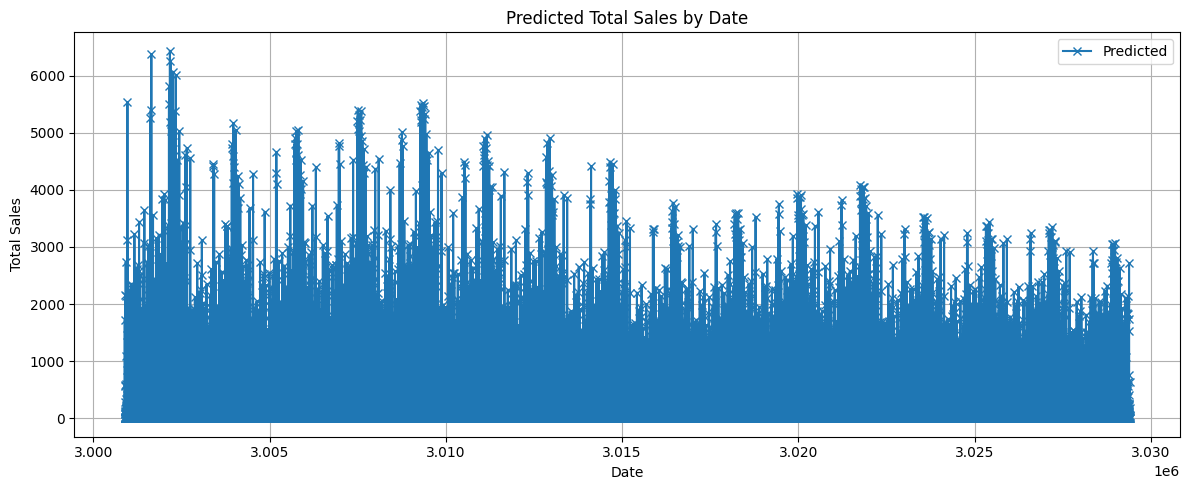

In [74]:
#Compute metrics
rmse  = mean_squared_error(sample_submission['sales'], submission_ensemble['sales'])
rmsle = np.sqrt(mean_squared_log_error(sample_submission['sales'], submission_ensemble['sales'],))

print(f"Ensemble RMSE:  {rmse:.4f}")
print(f"Ensemble RMSLE: {rmsle:.4f}")

#Plot Actual vs Predicted
plt.figure(figsize=(12,5))
plt.plot(submission_ensemble['id'] ,submission_ensemble['sales'], marker='x', label='Predicted')
plt.title('Predicted Total Sales by Date')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()